# Nivell 1
#### Exercici 1
Crea una base de dades relacionals senzilla utilitzant MySQL(https://www.mysql.com/) i connecta-la a Python

In [167]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [188]:
#Conexión con MySQL, nos conectamos a la base de datos tienda
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="****",
  database='tienda'
)

In [189]:
mycursor = mydb.cursor()

In [190]:
#mostramos todas las tablas de la base de datos tienda
mycursor.execute("SHOW TABLES")
for tabla in mycursor:
  print(tabla)

('client',)
('compra',)
('compra_detall',)
('establiment',)
('producte',)
('tipus_producte',)
('treballador',)


In [191]:
#Hacemos una consulta sencilla para ver los datos de las tablas cliente,trabajador y establecimiento
#Tenemos 5 clientes
mycursor.execute("SELECT * FROM CLIENT")
for x in mycursor:
  print(x)

(1, 'Chuck', 'Norris', '08080')
(2, 'Michael', 'Douglas', '08907')
(3, 'Luis', 'De Funes', '08802')
(4, 'Peter', 'Sellers', '56237')
(5, 'Alberto', 'Chicote', '08562')


In [192]:
#Tenemos 3 comerciales
mycursor.execute("SELECT * FROM TREBALLADOR")
for x in mycursor:
  print(x)

(1, 'Pedro', 'Lopez', 'Comercial', 1)
(2, 'Luis', 'Garcia', 'Comercial', 2)
(3, 'Rafa', 'Nadal', 'Comercial', 3)


In [193]:
#Tenemos 3 tiendas
mycursor.execute("SELECT * FROM establiment")
for x in mycursor:
  print(x)

(1, 'Condal', 'Barcelona', 100)
(2, 'La Industrial', 'Girona', 150)
(3, 'La Barata', 'Tarragona', 50)


# Nivell 2
#### Exercici 2
Mostra que pots carregar algunes consultes senzilles a un Pandas Dataframe.

In [194]:
#Cargamos toda la tabla producto
producto= df=pd.read_sql("SELECT * from producte",mydb)
producto

,idProducte,Nom,TipusID,Quantitat,Preu_unitat
0,1,Manzana,1,100,2.0
1,2,Pera,1,80,1.5
2,3,Vaso cristal,2,300,4.2
3,4,Plato ceramica,2,250,3.2
4,5,Pantalon vaquero,3,80,30.0
5,6,Camisa lisa,3,125,45.0
6,7,Libro Planeta,4,65,20.0
7,8,Pack DVD pelicula,4,70,55.0
8,9,Lejia 1L,5,260,10.0
9,10,Limpiacristales,5,120,6.5


In [195]:
# Creamos un dataframe agrupando por cliente e indicando el gasto total y el número de compras por cliente
df=pd.read_sql("SELECT b.nom NOM ,b.cognom COGNOM,sum(a.Total) GASTO,count(a.Total) COMPRAS \
from compra a \
join client b \
on a.ClientID=b.idClient \
group by b.Nom",mydb)

In [196]:
df

,NOM,COGNOM,GASTO,COMPRAS
0,Chuck,Norris,265.0,4
1,Michael,Douglas,205.0,3
2,Luis,De Funes,145.5,2
3,Peter,Sellers,113.5,2
4,Alberto,Chicote,219.0,2


# Nivell 3
#### Exercici 3
Genera algun gràfic que resumeixi les dades. 

In [306]:
# Creamos un dataframe con los datos más importantes del pedido
pedidos=pd.read_sql("select a.fecha Fecha,concat(b.nom,' ',b.cognom) Cliente,\
                     d.nom Tienda, \
                     concat(c.nom,' ',c.cognom) Empleado, \
                     a.Total \
                     from compra a \
                     join client b \
                     on a.ClientID=b.idClient \
                     join treballador c \
                     on a.TreballadorID=c.idTreballador \
                     join establiment d \
                     on c.EstablimentID=d.idEstabliment",mydb)

In [293]:
#Creamos un dataframe con los productos más vendidos en orden descendente
productos=pd.read_sql("select b.Nom, sum(a.Total) Total \
                        from compra_detall a \
                        join producte b \
                        on a.ProducteID=b.idProducte \
                        group by a.ProducteID \
                        order by Total desc",mydb)

In [224]:
pedidos

,Fecha,Cliente,Tienda,Empleado,Total
0,2021-04-27,Chuck Norris,Condal,Pedro Lopez,70.0
1,2021-04-29,Luis De Funes,Condal,Pedro Lopez,65.5
2,2021-04-30,Peter Sellers,Condal,Pedro Lopez,28.0
3,2021-04-30,Chuck Norris,Condal,Pedro Lopez,85.0
4,2021-04-28,Chuck Norris,La Industrial,Luis Garcia,85.0
5,2021-04-28,Michael Douglas,La Industrial,Luis Garcia,25.0
6,2021-04-29,Michael Douglas,La Industrial,Luis Garcia,150.0
7,2021-04-26,Alberto Chicote,La Industrial,Luis Garcia,64.0
8,2021-04-30,Alberto Chicote,La Industrial,Luis Garcia,155.0
9,2021-04-29,Michael Douglas,La Industrial,Luis Garcia,30.0


In [235]:
productos

,Nom,Total
0,Pack DVD pelicula,275.0
1,Pantalon vaquero,180.0
2,Camisa lisa,135.0
3,Lejia 1L,100.0
4,Vaso cristal,63.0
5,Libro Planeta,60.0
6,Manzana,48.0
7,Limpiacristales,32.5
8,Plato ceramica,32.0
9,Pera,22.5


In [308]:
from datetime import datetime
ventas=pedidos.groupby('Fecha').sum()['Total'].reset_index()
ventas.Fecha=ventas.Fecha.dt.day.astype('str')
ventas

,Fecha,Total
0,26,89.0
1,27,150.0
2,28,110.0
3,29,245.5
4,30,353.5


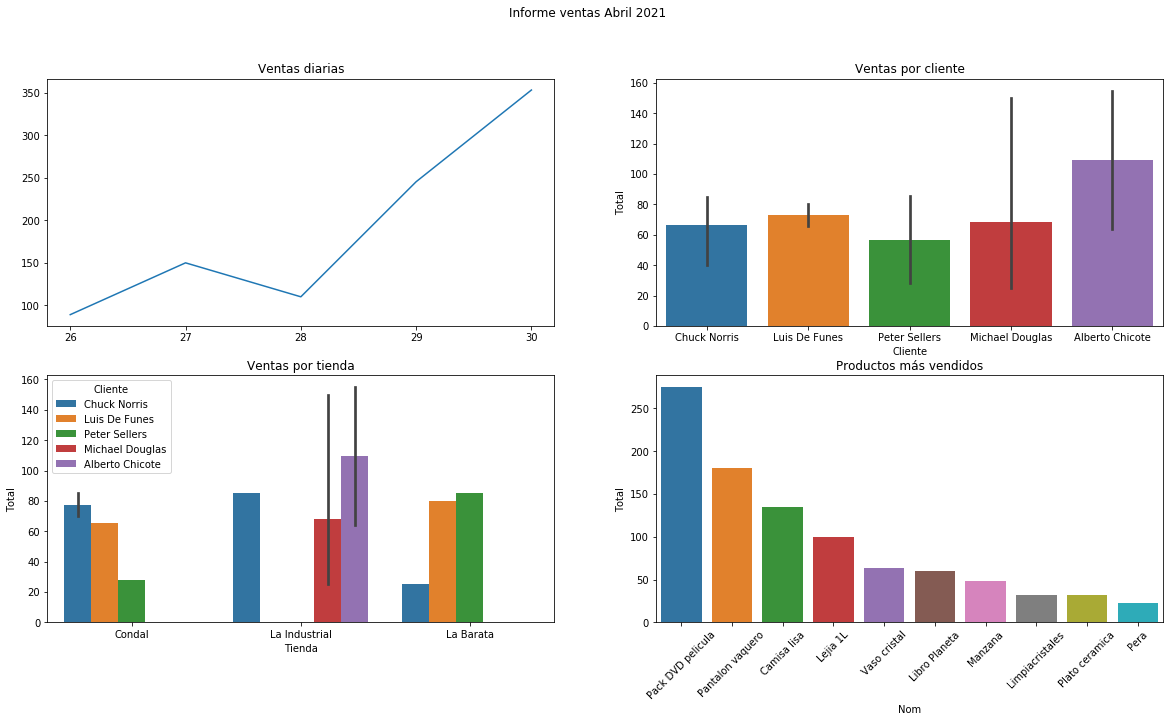

In [311]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.plot(ventas.Fecha,ventas.Total)
plt.title('Ventas diarias')
plt.subplot(2,2,2)
sns.barplot(x='Cliente',y='Total', data=pedidos)
plt.title('Ventas por cliente')
plt.subplot(2,2,3)
sns.barplot(x='Tienda',y='Total',data=pedidos,hue='Cliente')
plt.title('Ventas por tienda')
plt.subplot(2,2,4)
sns.barplot(x='Nom',y='Total', data=productos)
plt.title('Productos más vendidos')
plt.xticks(rotation=45)
plt.suptitle('Informe ventas Abril 2021')
plt.show()
